## Read data From our PySpark job

Install plot visual lib:

```bash
source venv/bin/activate
pip3 install matplotlib
```

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

### Read the aggregated data from our Spark Streaming session 
Data generated by our PySpark job: spark-streaming-job-3.py

In [90]:
# Create SparkSession
spark = SparkSession.builder\
             .master("local[1]")\
             .appName("spark-app-version-x")\
             .getOrCreate()

In [91]:
# Let's see the aggregated data now
output_files = '../spark_jobs/output_aggregations/'
df_aggr = spark.read.parquet(output_files)

In [92]:
# DF is like a relation table in memory. Let's see the columns
df_aggr.printSchema()

root
 |-- device_id: string (nullable = true)
 |-- window: struct (nullable = false)
 |    |-- start: timestamp (nullable = true)
 |    |-- end: timestamp (nullable = true)
 |-- avg(temperature): decimal(14,4) (nullable = true)



In [93]:
# Query sample:
df_aggr.sort('window','device_id').show(truncate=False)

+---------+------------------------------------------+----------------+
|device_id|window                                    |avg(temperature)|
+---------+------------------------------------------+----------------+
|device_1 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|-1.0000         |
|device_2 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|0.6087          |
|device_3 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|0.2174          |
|device_4 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|0.0370          |
|device_1 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|0.2069          |
|device_2 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|-1.0800         |
|device_3 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|-0.4400         |
|device_4 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|-1.0952         |
|device_1 |{2023-10-15 16:34:50, 2023-10-15 16:34:55}|-0.5417         |
|device_2 |{2023-10-15 16:34:50, 2023-10-15 16:34:55}|0.6364          |
|device_3 |{2023-10-15 16:34:50, 2023-10-15 16:34:55}|-0.6786   

In [94]:
# Query sample 
df_aggr.select(
        "device_id",
        "window",
        df_aggr.window.start.cast("string").alias("start"),
        df_aggr.window.end.cast("string").alias("end"), 
        "avg(temperature)"
        ).sort('start','device_id').show(truncate=False)

+---------+------------------------------------------+-------------------+-------------------+----------------+
|device_id|window                                    |start              |end                |avg(temperature)|
+---------+------------------------------------------+-------------------+-------------------+----------------+
|device_1 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|2023-10-15 16:34:40|2023-10-15 16:34:45|-1.0000         |
|device_2 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|2023-10-15 16:34:40|2023-10-15 16:34:45|0.6087          |
|device_3 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|2023-10-15 16:34:40|2023-10-15 16:34:45|0.2174          |
|device_4 |{2023-10-15 16:34:40, 2023-10-15 16:34:45}|2023-10-15 16:34:40|2023-10-15 16:34:45|0.0370          |
|device_1 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|2023-10-15 16:34:45|2023-10-15 16:34:50|0.2069          |
|device_2 |{2023-10-15 16:34:45, 2023-10-15 16:34:50}|2023-10-15 16:34:45|2023-10-15 16:34:50|-1.0800   

In [95]:
# Query sample
df_aggr.select(
            "device_id",
            df_aggr.window.start.cast("string").alias("start_time"),
            "avg(temperature)"
        ) \
        .where(df_aggr.device_id == 'device_3') \
        .sort('start_time','device_id') \
        .show(truncate=False)

+---------+-------------------+----------------+
|device_id|start_time         |avg(temperature)|
+---------+-------------------+----------------+
|device_3 |2023-10-15 16:34:40|0.2174          |
|device_3 |2023-10-15 16:34:45|-0.4400         |
|device_3 |2023-10-15 16:34:50|-0.6786         |
|device_3 |2023-10-15 16:34:55|0.0000          |
|device_3 |2023-10-15 16:35:00|-0.1212         |
|device_3 |2023-10-15 16:42:00|-0.3684         |
|device_3 |2023-10-15 16:42:05|-0.1579         |
+---------+-------------------+----------------+



In [96]:
# Query sample
df_visual = df_aggr.select(
                    df_aggr.window.start.cast("string").alias("start_time"),
                    "avg(temperature)"
                ) \
                .where(df_aggr.device_id == 'device_3') \
                .sort('start_time','device_id')

In [97]:
# Rename some cols
df_visual = df_visual.withColumnRenamed('avg(temperature)','avg_temperature')

In [98]:
# To pandas for visualization
df_visual_pd = df_visual.toPandas()

<Axes: >

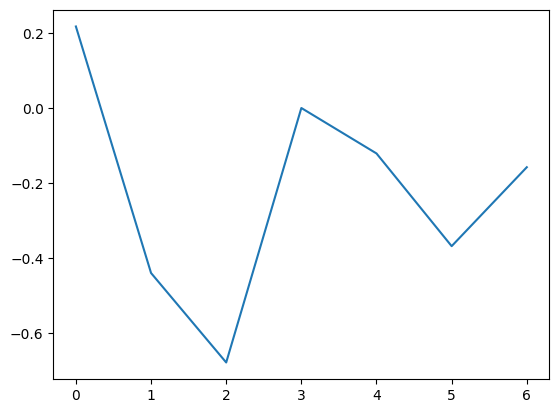

In [99]:
# Visuals
df_visual_pd = df_visual_pd['avg_temperature'].astype(float)
df_visual_pd.plot.line()

In [100]:
# Query sample
df_visual = df_aggr.select(
                    "device_id",
                    df_aggr.window.start.cast("string").alias("start_time"),
                    "avg(temperature)"
                ) \
                .sort('start_time','device_id')

In [101]:
# Rename some cols
df_visual = df_visual.withColumnRenamed('avg(temperature)','avg_temperature')

In [102]:
# To pandas for visualization
df_visual_pd = df_visual.toPandas()

# using dictionary to convert specific columns
convert_dict = {'device_id': str,
                'start_time': str,
                'avg_temperature': float
                }

# df_visual_pd = df_visual_pd['avg_temperature'].astype(float)
df_visual_pd = df_visual_pd.astype(convert_dict)

In [103]:
# Specify the Date as Time index
df_visual_pd_s2 = df_visual_pd.pivot(index='start_time', columns='device_id', values='avg_temperature')

<Axes: xlabel='start_time'>

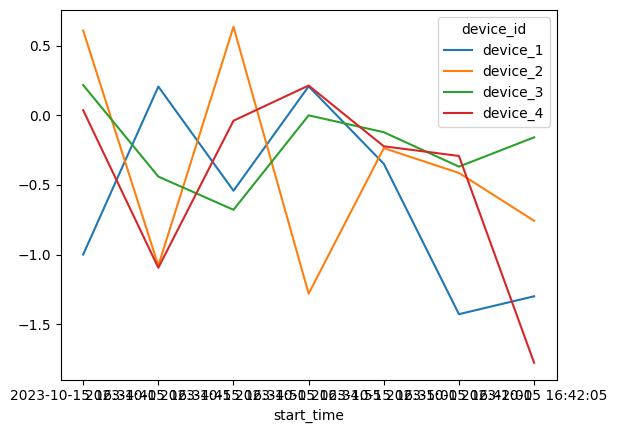

In [104]:
# Visuals
df_visual_pd_s2.plot.line()

In [105]:
# Stop the session
spark.stop()